# Банки — Сегментация пользователей по потреблению

## Задача: 

#### Проанализируйте клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.

* Проведите исследовательский анализ данных.

* Сегментируйте пользователей на основе данных о количестве потребляемых продуктов.

* Сформулируйте и проверьте статистические гипотезы.

        Проверьте гипотезу различия дохода между теми клиентами, которые
        пользуются двумя продуктами банка, и теми, которые пользуются одним.
        
        Сформулируйте и проверьте статистическую гипотезу относительно
        представленных данных.


## Описание данных:

           Датасет bank_dataset.csv содержит данные о клиентах банка «Метанпром». Банк располагается в
           Ярославле и областных городах: Ростов Великий и Рыбинск.


### Колонки:

* userid — идентификатор пользователя,
* score — баллы кредитного скоринга,
* City — город,
* Gender — пол,
* Age — возраст,
* Objects — количество объектов в собственности,
* Balance — баланс на счёте,
* Products — количество продуктов, которыми пользуется клиент,
* CreditCard — есть ли кредитная карта,
* Loyalty — активный клиент,
* estimated_salary — заработная плата клиента,
* Churn — ушёл или нет.

## Декомпозиция. Порядок-план выполнения проекта.


* [Шаг 1. Откроем файл с данными и изучим общую информацию, оценим данные](#1)

##### Оценка данных.
##### Выводы.


* [Шаг 2. Подготовим данные](#2)

##### Проверим  и исправим столбцы.
##### Проверим  и исправим типы данных если надо.
##### Проверим  дубликаты и пропуски, исправим если надо.
##### Выводы.


* [Шаг 3. Проведем исследовательский анализ данных (EDA)](#3)

##### Анализ по отдельным показателям сета (для каждого столбца).
##### Оценка распределений по признакам среди клиентов.
##### Оценка наличия выбросов.
#####  Оценка корреляций признаков друг с другом и с уходом клиента.
##### Выводы.

* [Шаг 4. Сегментация клиентов по потреблению](#4)

##### Выделим сегменты на основе колличества потребляемых услуг.
##### Проанализируем полученные сегменты на особенности распределения остальных признаков (портреты пользователей).
##### Выводы

* [Шаг 5. Проверка статистических гипотез](#5)

##### Проверка гипотезы о равенстве доходов между клиентами с одним и двумя продуктами
##### Проверка гипотезы о равенстве оттока клиентов между выделенными выше сегментами 
##### Выводы


* [Шаг 5. Результаты выводы](#6)

##### Общий вывод
##### Рекомендации по результатам исследования


* [Шаг 6. Ссылки](#7)
##### Дашбоард.
##### Презентация.

### Откроем файл с данными и изучим общую информацию, оценим данные
<a class="anchor" id="1"></a>

In [1]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from statsmodels.stats import weightstats as stests

In [2]:
data=pd.read_csv('bank_dataset.csv')
data.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
data.shape

(10000, 12)

In [5]:
def series_analise(series):
    print('--------------------------------------------------------------------------------------------------')
    print('Имя столбца',series.name)
    print('Тип данных',series.dtypes)
    try: 
        return f"Для этого столбца Среднеее значение:{series.mean()}" + "\n" + f"Максимальное значение: {series.max()}"+ "\n" + f"Минимальное значение: {series.min()}"+ "\n" + f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"
    except:
        return f"Для этого столбца" + "\n" f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"

In [6]:
for i in data.columns:
    print(series_analise(data[i]))

--------------------------------------------------------------------------------------------------
Имя столбца userid
Тип данных int64
Для этого столбца Среднеее значение:15733676.5694
Максимальное значение: 15858426
Минимальное значение: 15608437
Всего наблюдений: 10000
Уникальные значения: [15677338 15690047 15662040 ... 15627268 15725091 15671055]
--------------------------------------------------------------------------------------------------
Имя столбца score
Тип данных int64
Для этого столбца Среднеее значение:650.5288
Максимальное значение: 850
Минимальное значение: 350
Всего наблюдений: 10000
Уникальные значения: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 

Проверим дубликаты.

In [7]:
data.duplicated().sum()

0

Проверим пропуски

In [8]:
data.isna().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

В столбце баланс присутствуют пропуски в кол-ве 3617 шт, большой процент пропусков удалять нельзя, нужно будет разобраться с их происхождением.

 #### Вывод. 
 * В сете (10000 записей, 12 столбцов)
 * Необходимо проправить названия столбцов.
 * Типы данных по столбца удовлетворительные.
 * Столбец balance 3617 пропусков требует анализа, большое колво пропусков удалять нельзя.
 * В столбце зарплаты присутствует выбросы надо смотреть дополнительно.

### Подготовим данные.
<a class="anchor" id="2"></a>

Исправим названия столбцов.

In [9]:
data.columns = data.columns.str.lower()
data 

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


Заменим наны для удобства на 0.

In [10]:
data['balance'] = data['balance'].fillna(0)

Проверим соотношение нулевых балансов и факта наличия кредитной карты.

In [11]:
data.query('balance==0').groupby('creditcard')['balance'].count()

creditcard
0    1025
1    2592
Name: balance, dtype: int64

Итак: Среди имеющих кредитную карту нулевых балансов больше в 2.5 раз. Можно предположить что NaN были ситуацией когда человек взял кредит и еще не начал его отдавать, тоесть денег на счет не поступало. Замена на 0 оправдана. 

Проверим зарплаты.

In [12]:
data['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

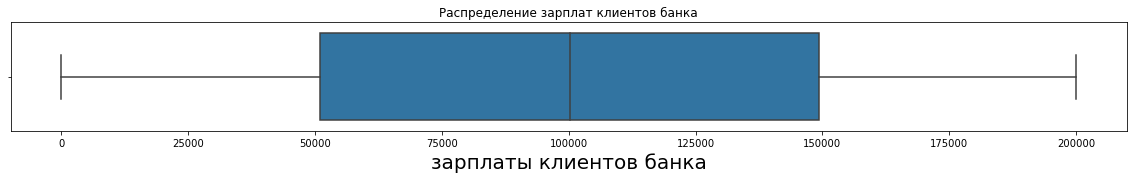

In [13]:
plt.figure(figsize=(20, 2))
plt.title('Распределение зарплат клиентов банка')
sns.boxplot(x=data['estimated_salary'])
plt.xlabel('зарплаты клиентов банка', fontsize=20)
plt.show();

Странно но даже значение в 11.58 не выглядит как выброс (ошибка заведения данных и тд), оставим как есть.

#### Вывод.
* Заменили названия столбцов на строчные.
* Заменили наны в столбце balance на 0.
* Данные готовы к анализу.

### Проведем исследовательский анализ данных
<a class="anchor" id="3"></a>

#### Анализ по отдельным показателям сета (для каждого столбца).

In [14]:
data.drop('userid', axis=1).describe()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Cредние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [15]:
data_churn=data.drop('userid', axis=1).groupby('churn').mean().transpose()
data_churn

churn,0,1
score,651.853196,645.351497
age,37.408389,44.837997
objects,5.033279,4.932744
balance,72745.296779,91108.539337
products,1.544267,1.475209
creditcard,0.707146,0.699067
loyalty,0.554565,0.360825
estimated_salary,99738.391772,101465.677531


#### Оценка распределений по признакам среди клиентов

Для удобства разделим признаки на числовые и категориальные.

In [16]:
# список числовых столбцов.
float_columns=['score','age','balance','estimated_salary']
cat_columns=['objects','products','creditcard','loyalty','city','gender','churn']

In [17]:
#Функция для отрисовки числовых графиков.
def graf_cluster_float(list):
    for column in list:
        plt.figure(figsize=(15, 5))
        sns.histplot(data, x=column, bins=30, palette='magma')
        plt.title(f'Признак - {column}')
        plt.ylabel("Клиенты")
        plt.show()


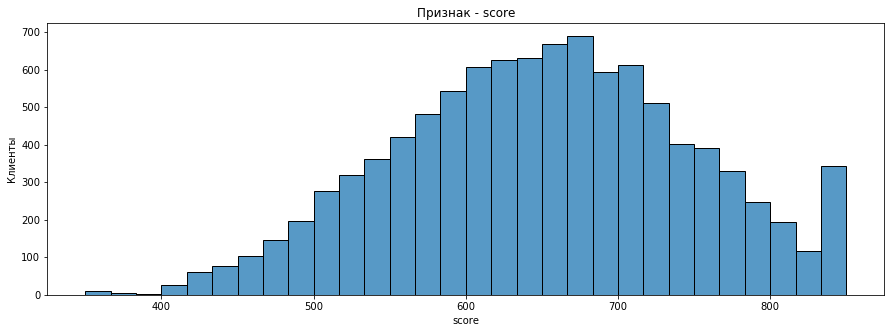

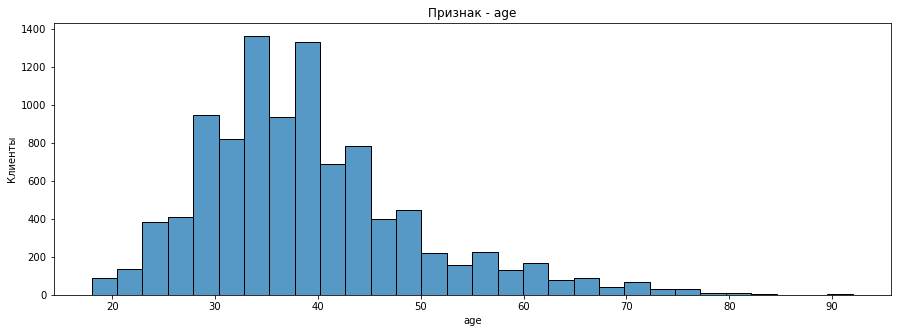

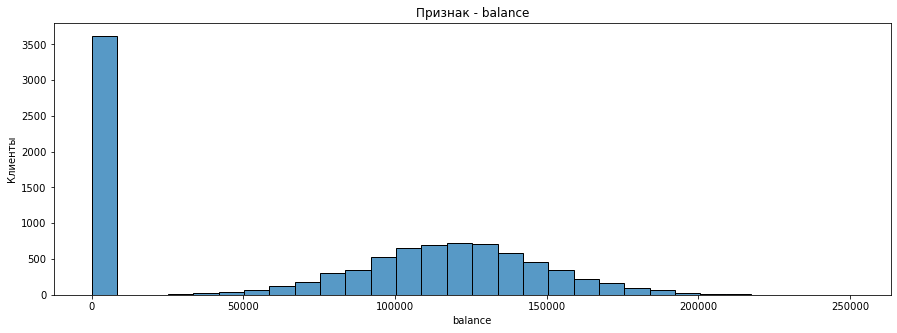

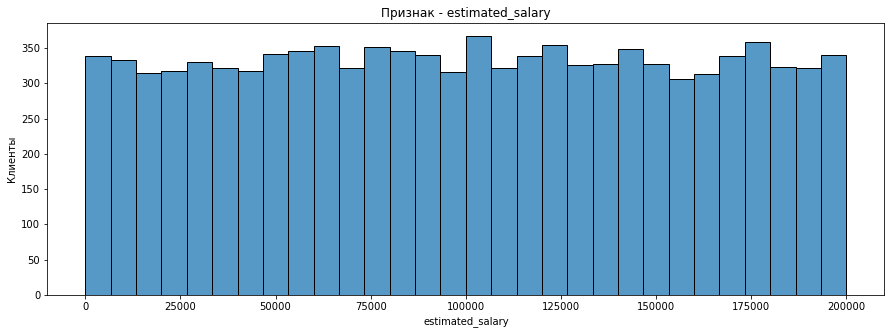

In [18]:
graf_cluster_float(float_columns)

In [19]:
# Функция для отристовки признаков кластеров.
def graf_cluster(list):
    for column in list:
        plt.figure(figsize=(10, 5))
        sns.countplot(x = data[column], data=data)
        plt.title(f'Признак - {column}')
        plt.show()


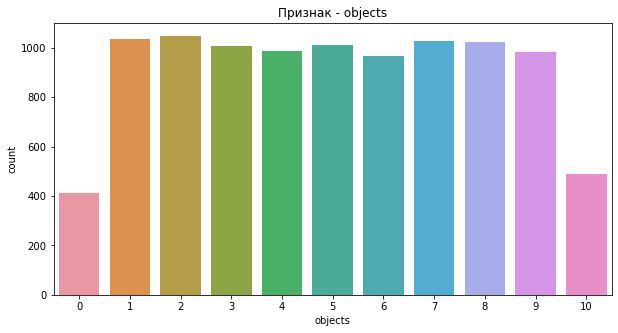

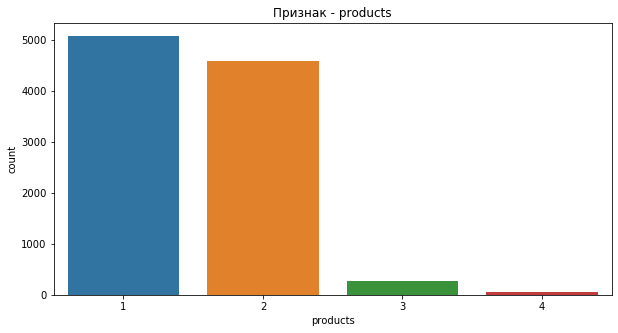

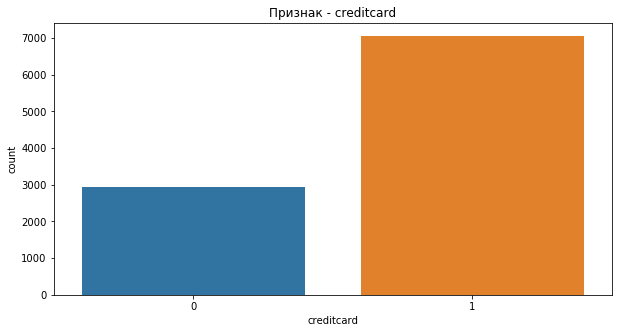

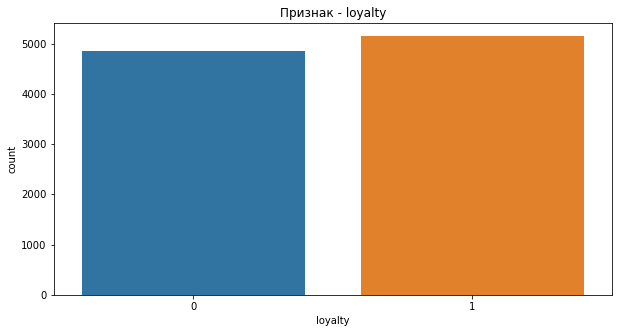

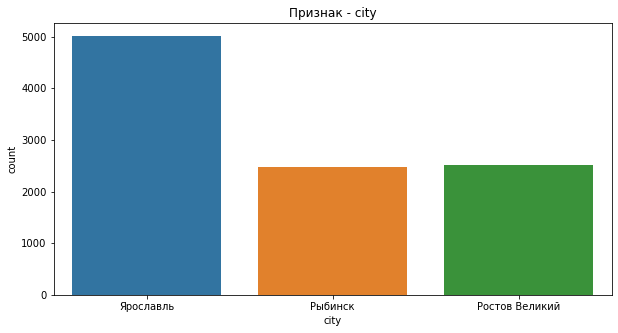

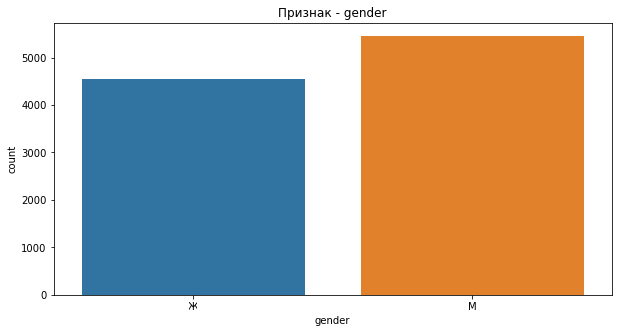

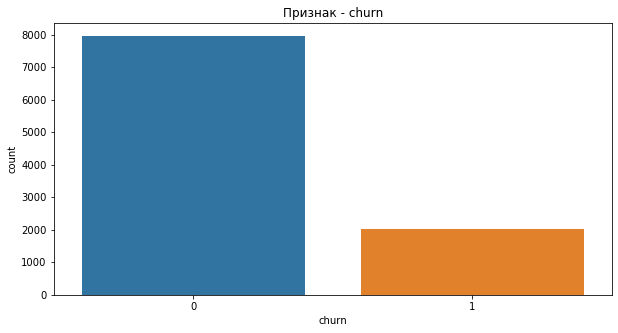

In [20]:
graf_cluster(cat_columns)

#### Оценка наличия выбросов.

In [21]:
#Функция для отрисовки ящиков с усами.
def graf_cluster_float_boxplot(list):
    for column in list:
        plt.figure(figsize=(15, 5))
        sns.boxplot(x=data[column])
        plt.title(f'Признак - {column}')
        plt.show()


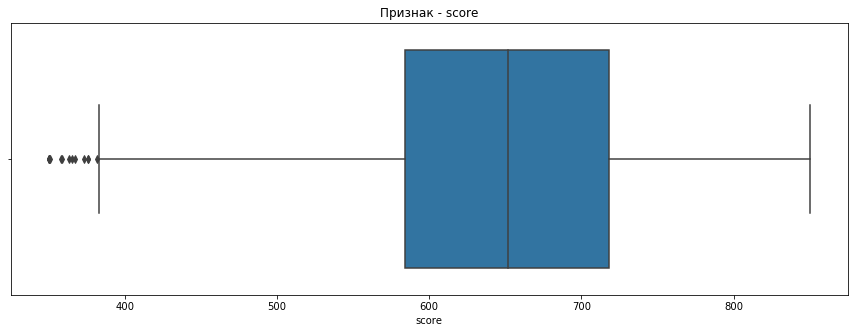

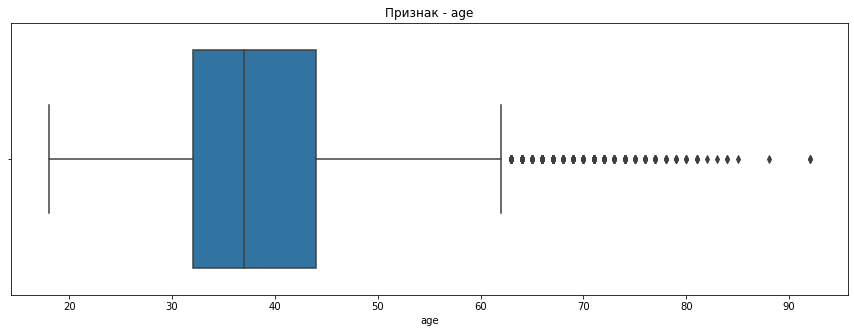

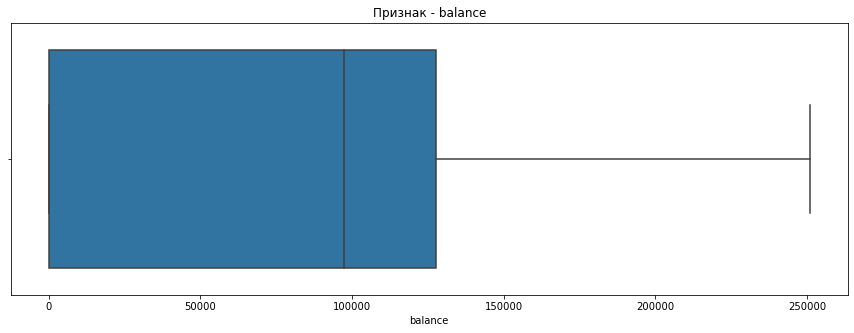

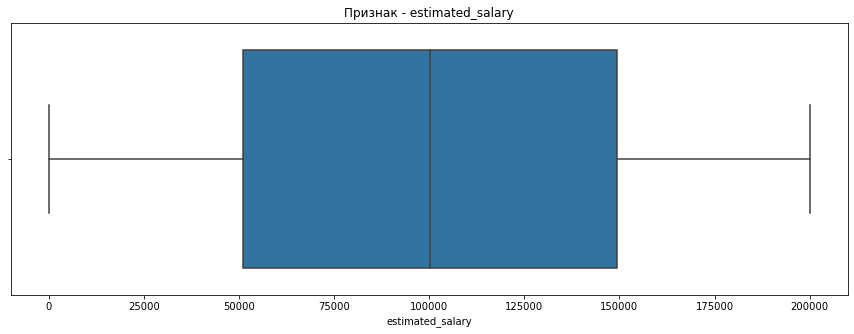

In [22]:
graf_cluster_float_boxplot(float_columns)

Имеем выбросы в рейтинге и возрасте. 

In [23]:
display(np.percentile(data['age'], [95, 97.5, 99]))
display(np.percentile(data['score'], [5, 2.5, 1]))

array([60., 66., 72.])

array([489., 461., 432.])

Распределение баланса сильно сдвинуто в сторону 0 за счет наших 0вых балансов, имеет смысл посмотреть на распределение балансов среди не нулевых.

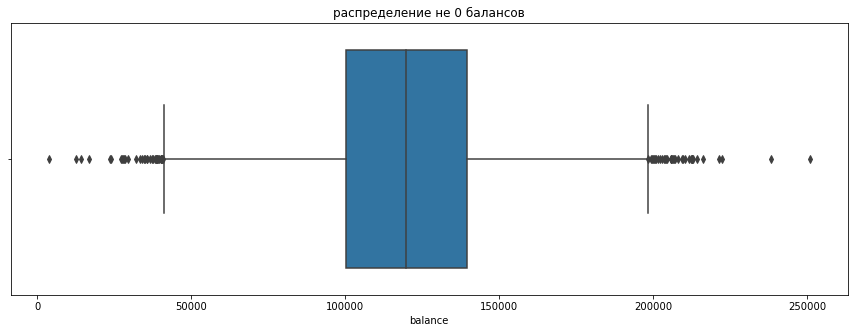

In [24]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=data.query('balance!=0')['balance'])
plt.title('распределение не 0 балансов')
plt.show()

In [25]:
display(np.percentile(data.query('balance!=0')['balance'], [95, 97.5, 99]))
display(np.percentile(data.query('balance!=0')['balance'], [5, 2.5, 1]))

array([169984.256 , 180011.959 , 190495.1706])

array([70367.943 , 60452.0625, 47505.449 ])

#### Вывод для дальнейшего анализа из сета можно убрать людей старше 72 лет, имеющих рейтинг менее 432,  имеющих баланс меньше 47505 и больше 190495.

Найдем этих людей.

In [26]:
anomal_users=data.query('balance!=0').query('balance>190495 or balance < 47505')
anomal_users_age=data.query('age > 72 or score < 432')
anomal_users=anomal_users['userid'].unique()
anomal_users_age=anomal_users_age['userid'].unique()

In [27]:
data=data.query('userid not in @anomal_users')
data=data.query('userid not in @anomal_users_age')

#### Оценка корреляций признаков друг с другом и с уходом клиента.

#### Подготовим сет для анализа корреляции.


In [28]:
cor_data = pd.get_dummies(data)
display(cor_data.head())

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,0.00,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


In [29]:
# Исправим города.
cor_data=cor_data.rename(columns={"city_Ростов Великий": "rostov","city_Рыбинск":"rybinsk","city_Ярославль":"yaroslavl"})
cor_data

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov,rybinsk,yaroslavl,gender_Ж,gender_М
0,15677338,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,0.00,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,0,1
9996,15612628,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,15627268,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,1,0
9998,15725091,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


In [30]:
#Исправим пол 1=муж, 0=жен.
cor_data=cor_data.drop(['gender_Ж'], axis=1)
cor_data=cor_data.rename(columns={"gender_М": "gender"})
cor_data

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov,rybinsk,yaroslavl,gender
0,15677338,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,15744090,699,39,1,0.00,2,0,0,93826.63,0,0,0,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,1
9996,15612628,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,1
9997,15627268,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,15725091,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,1


In [31]:
cor_data.drop(['userid'], axis=1).corr()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov,rybinsk,yaroslavl,gender
score,1.000000,-0.003498,-0.002464,0.007008,0.011261,-0.002044,0.022975,-0.000832,-0.013931,0.006945,0.003479,-0.009031,-0.001591
age,-0.003498,1.000000,-0.012762,0.035659,-0.029515,-0.011560,0.066612,-0.008039,0.316397,0.051339,0.000537,-0.045013,-0.026882
objects,-0.002464,-0.012762,1.000000,-0.011490,0.014284,0.022969,-0.029306,0.008599,-0.013082,0.002186,0.004549,-0.005827,0.012727
balance,0.007008,0.035659,-0.011490,1.000000,-0.310027,-0.013611,-0.009510,0.010029,0.115320,0.411697,-0.142409,-0.234235,0.009926
products,0.011261,-0.029515,0.014284,-0.310027,1.000000,0.004689,0.011642,0.014595,-0.049101,-0.014431,0.010435,0.003509,-0.019847
creditcard,-0.002044,-0.011560,0.022969,-0.013611,0.004689,1.000000,-0.012481,-0.009208,-0.006687,0.009924,-0.014517,0.003928,0.005950
loyalty,0.022975,0.066612,-0.029306,-0.009510,0.011642,-0.012481,1.000000,-0.007854,-0.153106,-0.018759,0.016477,0.002045,0.022686
estimated_salary,-0.000832,-0.008039,0.008599,0.010029,0.014595,-0.009208,-0.007854,1.000000,0.006196,0.010613,-0.007964,-0.002330,-0.009132
churn,-0.013931,0.316397,-0.013082,0.115320,-0.049101,-0.006687,-0.153106,0.006196,1.000000,0.183809,-0.057129,-0.110152,-0.102739
rostov,0.006945,0.051339,0.002186,0.411697,-0.014431,0.009924,-0.018759,0.010613,0.183809,1.000000,-0.332960,-0.580133,-0.025639


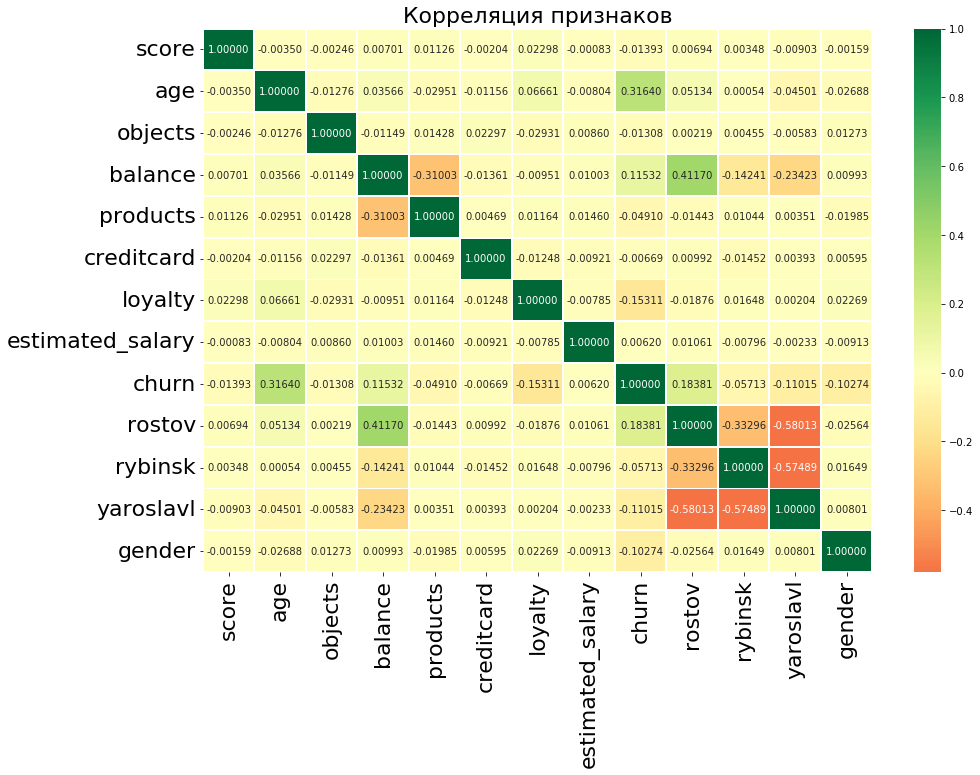

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(cor_data.drop(['userid'], axis=1).corr(),cmap='RdYlGn', center=0, annot=True,fmt = '0.05f', linewidths=.9,)
plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

#### Выводы по шагу.
* Для дальнейшего анализа из сета можно убрать людей старше 72 лет, имеющих рейтинг менее 432, имеющих баланс меньше 47505 и больше 190495.


* В очищенном от выбросов сете, провели оценку кореляции признаков друг с другом и с уходом.

* Выраженной корреляции между признаками не наблюдаеться.
* Присутствует корреляция баланса и города ожидания Ростов великий 0.41, это ожидаемо административный центр.
* Между балансом и колличеством используемых продуктов слабая отрицательная взаимосвязь -0.30.
* Возраст коррелирует с оттоком 0.30.

### Сегментация клиентов по потреблению
<a class="anchor" id="4"></a>

#### Выделим сегменты на основе колличества потребляемых услуг.

In [33]:
display(data.drop(['userid'], axis=1).groupby(by='products').mean())

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,
1,651.720090,39.324622,4.971621,98331.114835,0.702532,0.500000,99474.451307,0.274602
2,653.990623,37.422416,5.058495,51432.369252,0.707301,0.530252,100540.767636,0.074347
3,652.550781,43.070312,4.957031,74589.834727,0.714844,0.421875,103917.621211,0.824219
4,658.140351,45.912281,5.368421,92400.572632,0.684211,0.491228,105335.452982,1.000000


In [34]:
def graf_segment_products(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.countplot(x = data[column], hue='products', data=data)
        plt.title(column)
        plt.show()

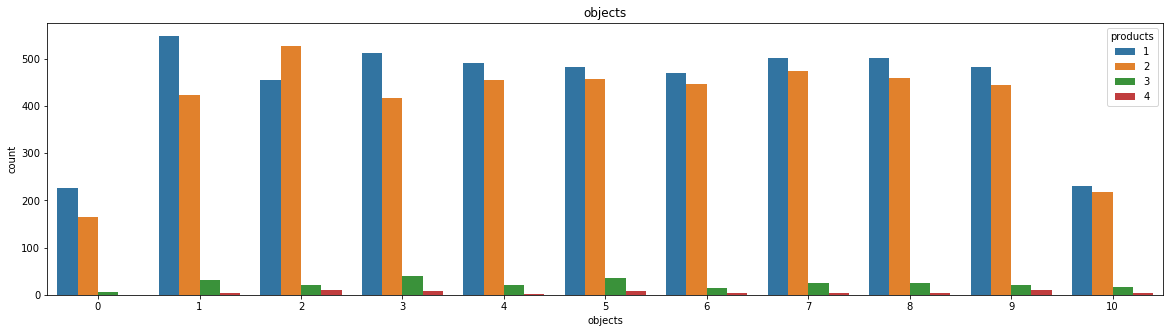

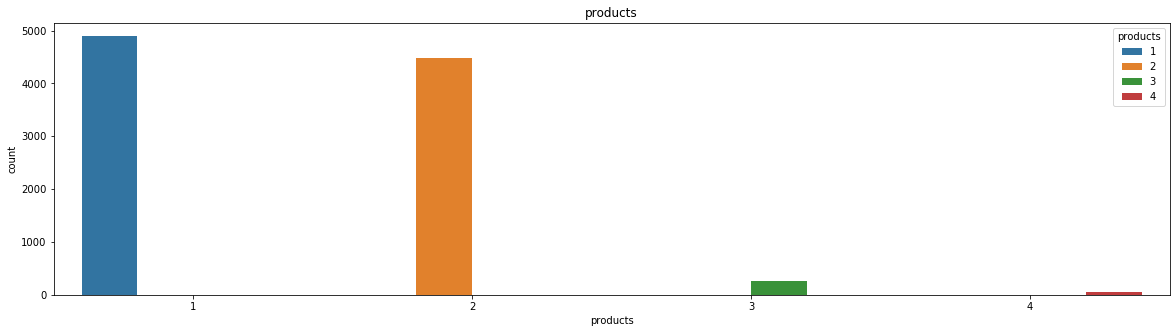

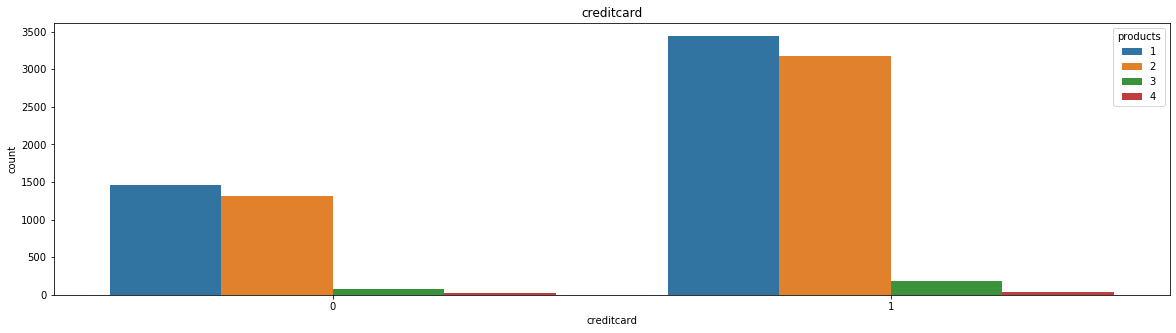

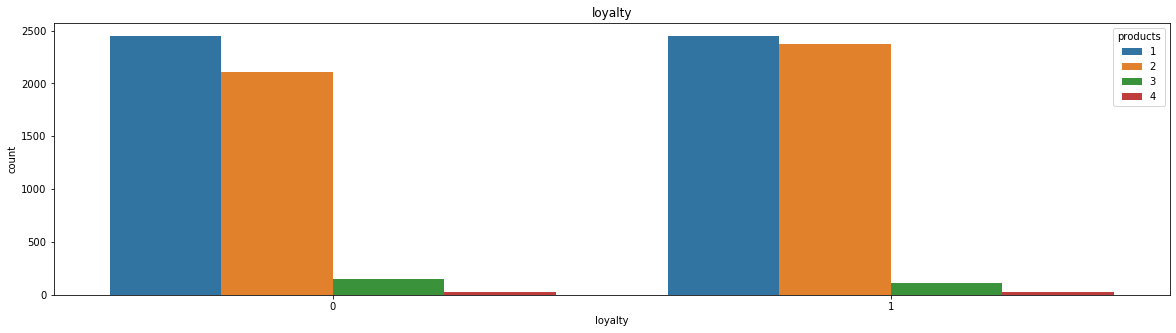

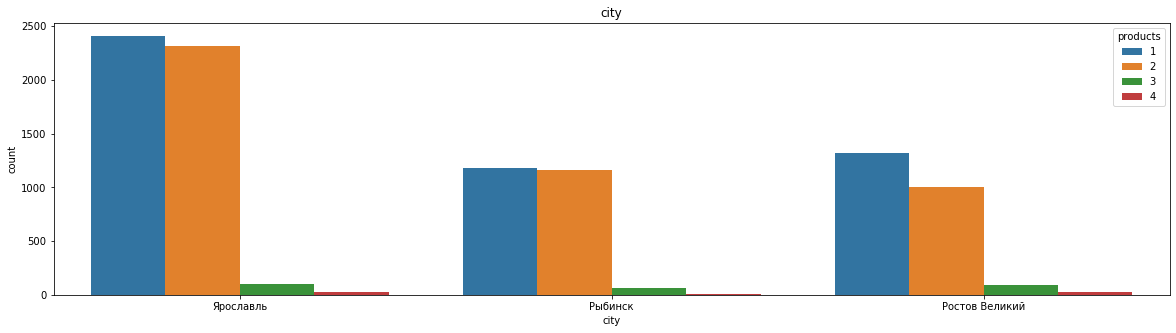

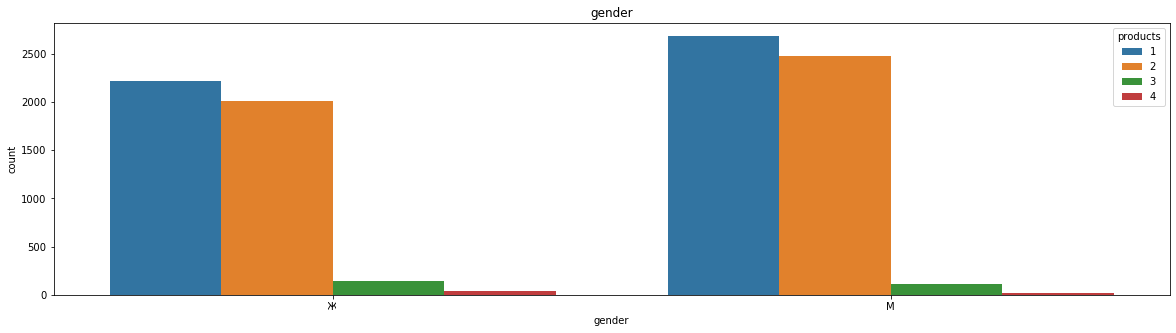

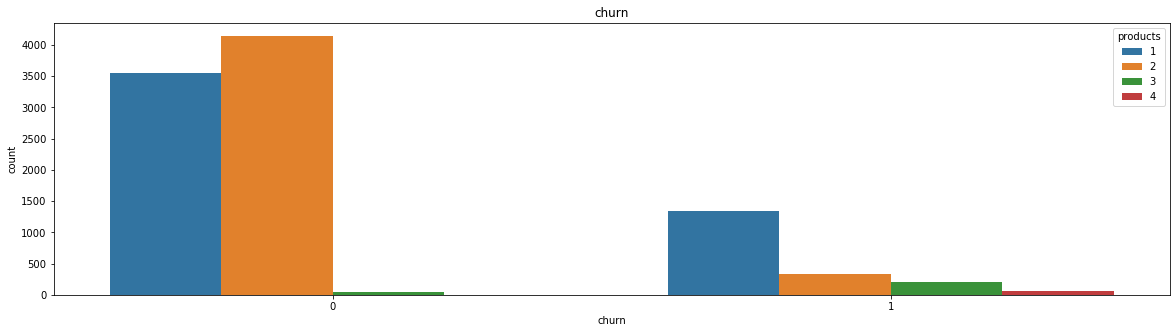

In [35]:
graf_segment_products(cat_columns)

In [36]:
def graf_segment_float(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.histplot(x = data[column], hue='products', data=data,palette='twilight_shifted_r')
        plt.title(f'Признак - {column}')
        plt.ylabel("клиенты")
        plt.show()

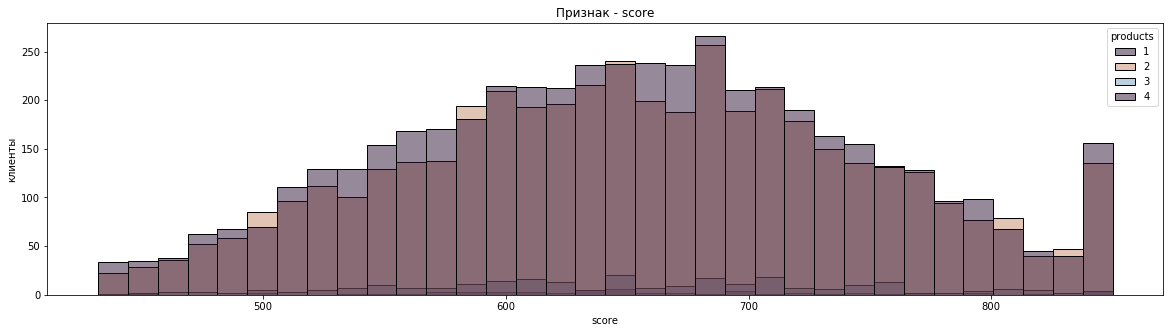

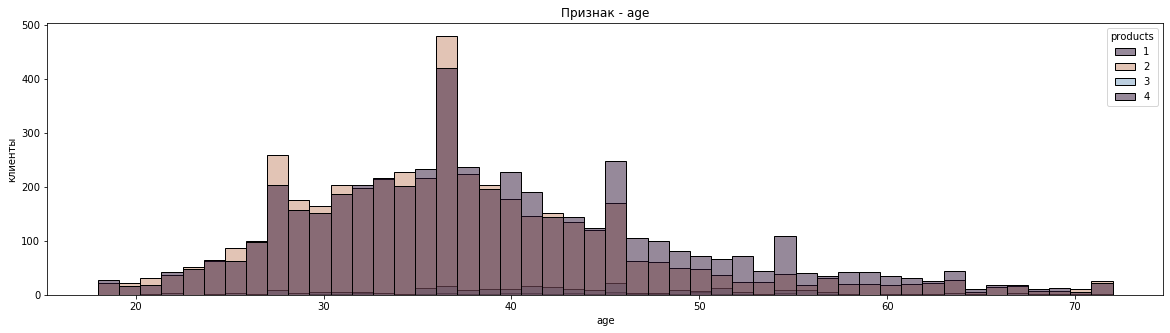

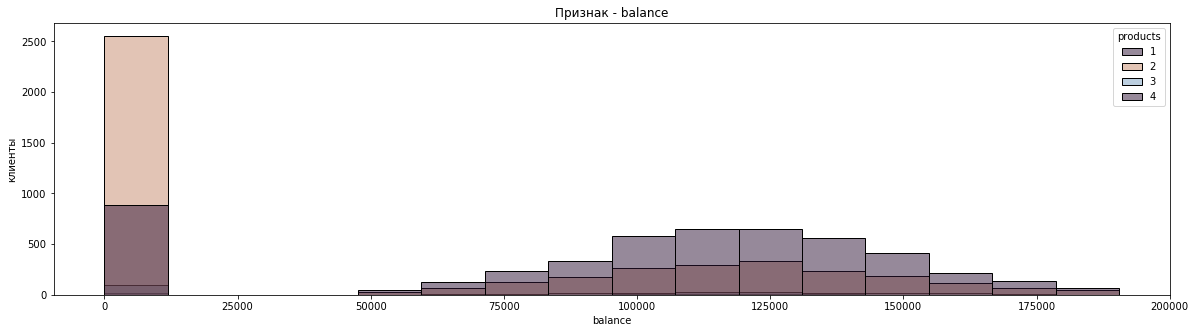

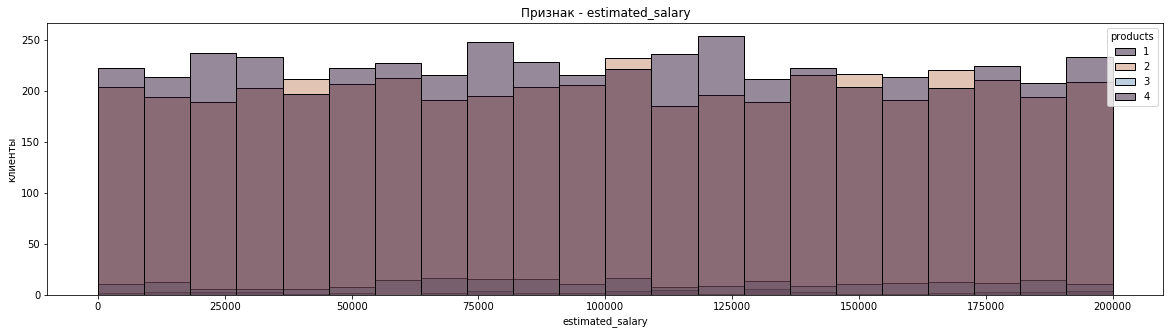

In [37]:
graf_segment_float(float_columns)

In [38]:
def graf_segment_products(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.countplot(x = data[column], hue='churn', data=data)
        plt.title(column)
        plt.show()

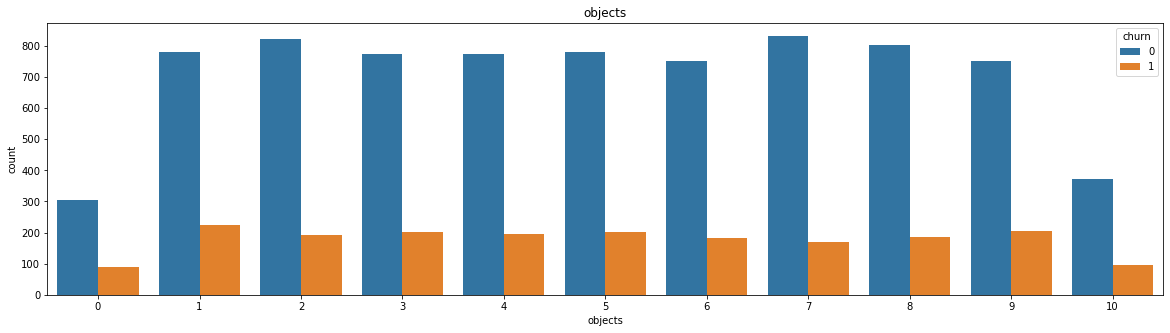

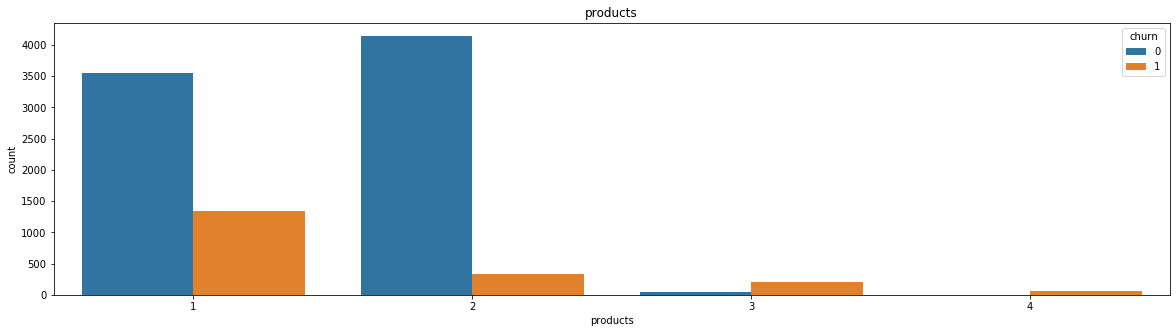

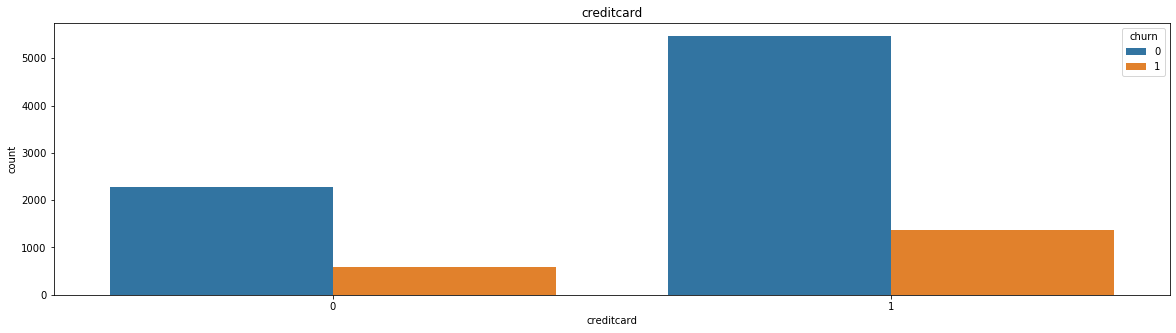

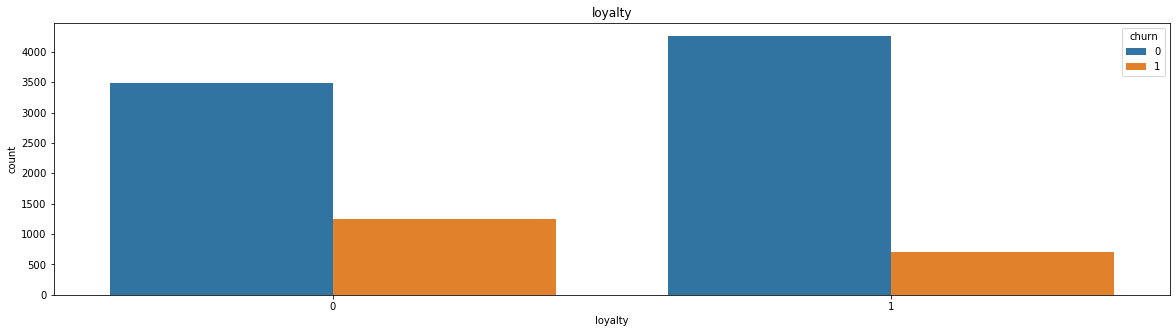

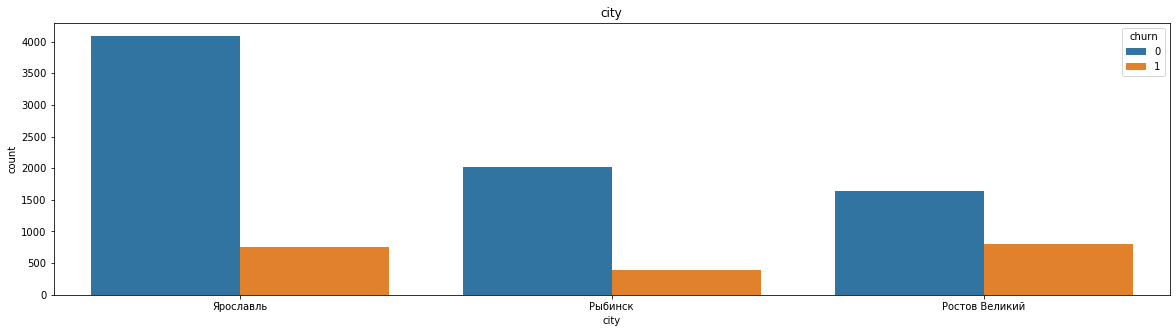

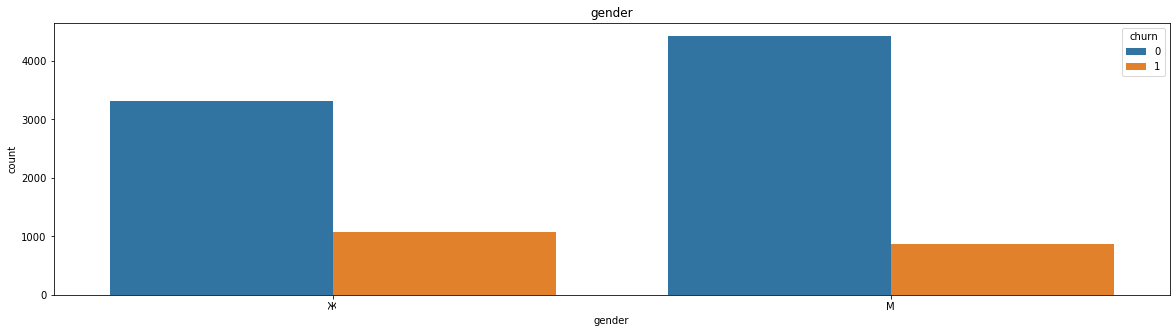

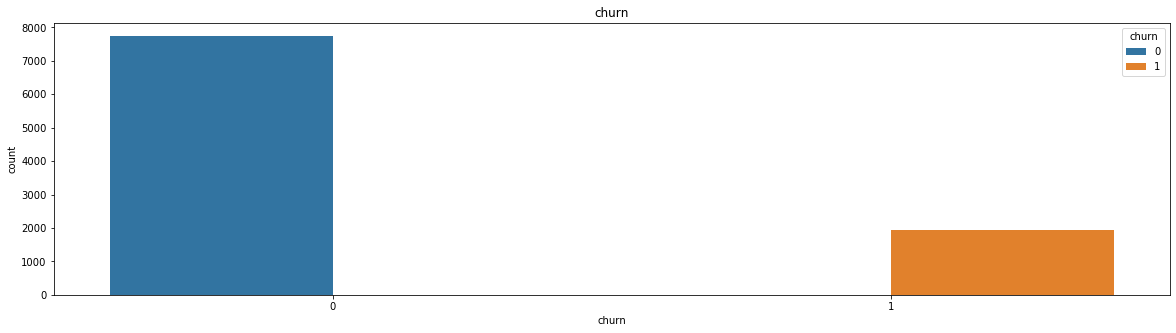

In [39]:
graf_segment_products(cat_columns)

In [40]:
def graf_segment_float(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.histplot(x = data[column], hue='churn', data=data,palette='twilight_shifted_r')
        plt.title(f'Признак - {column}')
        plt.ylabel("клиенты")
        plt.show()

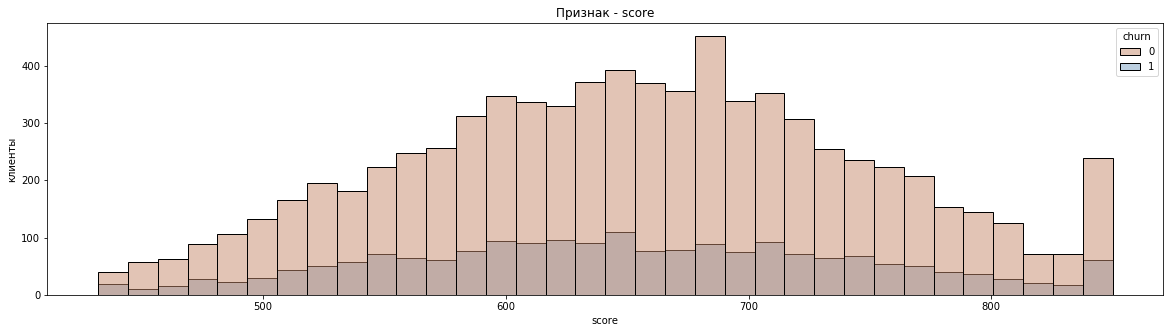

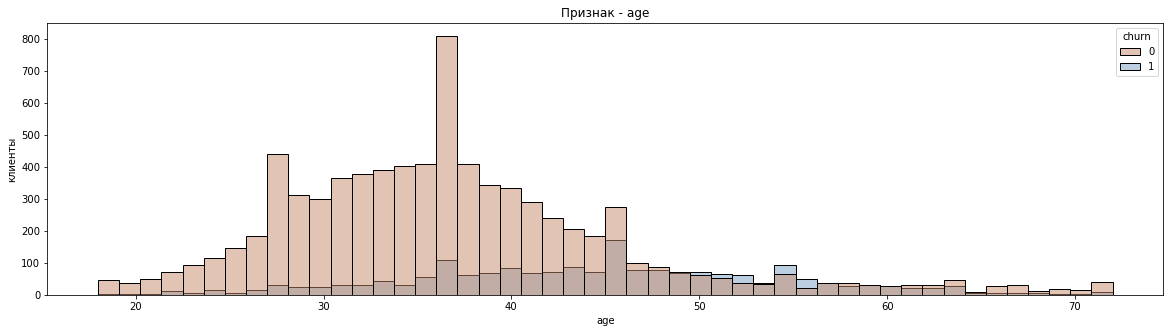

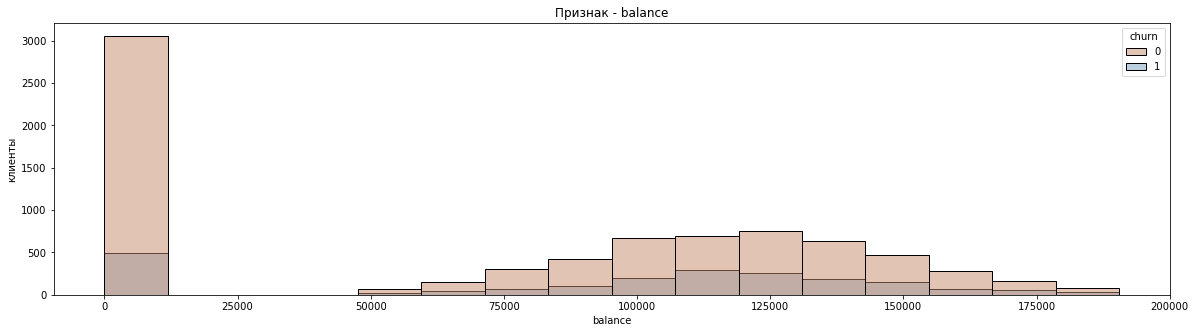

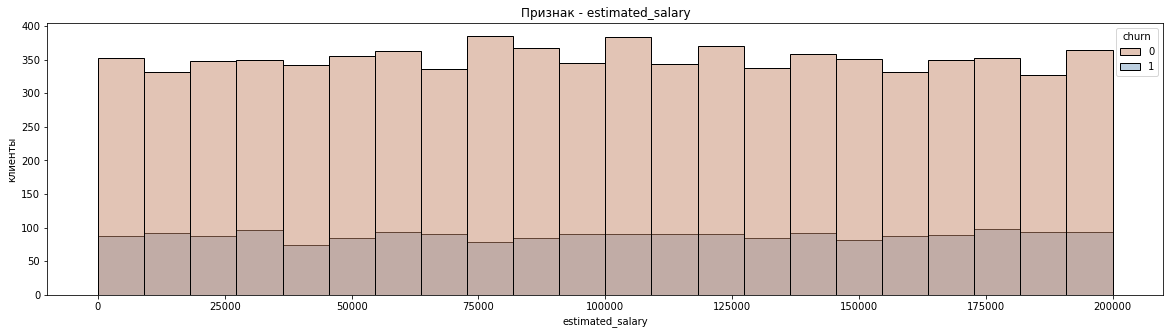

In [41]:
graf_segment_float(float_columns)

#### Вывод резко отличаеться от остальных клиенты которые потребляют 2 продукта, отличие присутствует в признаках age, balance, churn, loyalty.

### Добавим столбец с сегментом. 1 3 4 продукта = 1 сегмент. 2 продукта = 2 сегмент. 


In [42]:
def segment_category(data):
    floor = data['products']
    if  floor == 1:
        return 1
    elif floor == 3:
        return 1
    elif floor == 4:
        return 1
    else:
        return 2
data["segment"]=data.apply(segment_category,axis=1)
data.head(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,segment
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,2
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1


### Проанализируем полученные сегменты на особенности распределения остальных признаков (портреты пользователей).

#### Средние величины по сегментам.


In [43]:
display(data.drop(['userid'], axis=1).groupby(by='segment').mean())

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
segment,,,,,,,,,
1,651.831126,39.580695,4.975245,97099.909958,1.131069,0.702936,0.496066,99756.840213,0.309538
2,653.990623,37.422416,5.058495,51432.369252,2.000000,0.707301,0.530252,100540.767636,0.074347


### Вывод сегментация оправдана, средний шанс покинуть банк отличаеться по сегментам значительно. У 1го сегмента почти в 4 раза выше, кроме того баланс по сегментам в 2 раза выше в 1м сегменте. 

Отрисуем распределение категориальных признаков по сегментам.

In [44]:
def graf_segment_products(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.countplot(x = data[column], hue='segment', data=data)
        plt.title(column)
        plt.show()

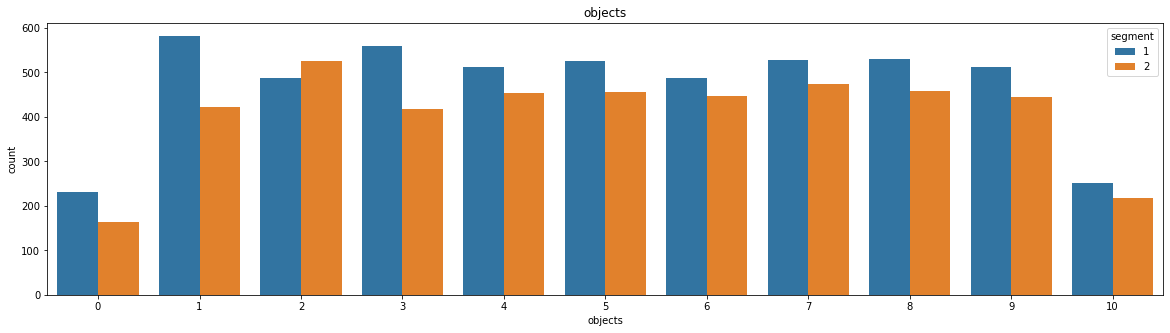

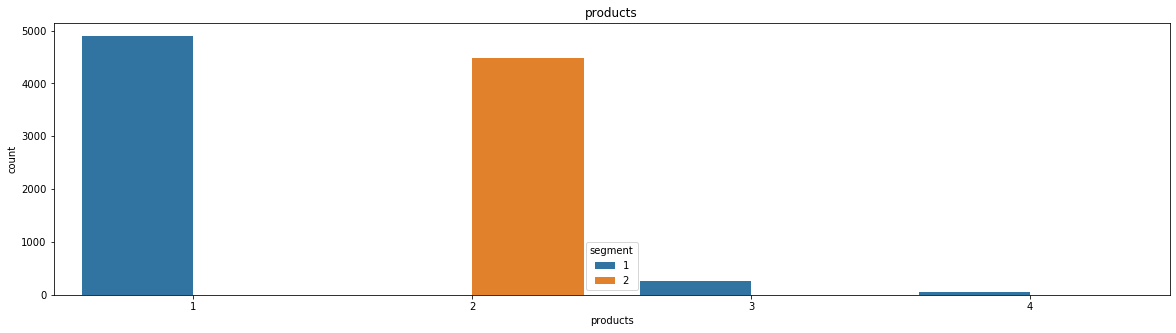

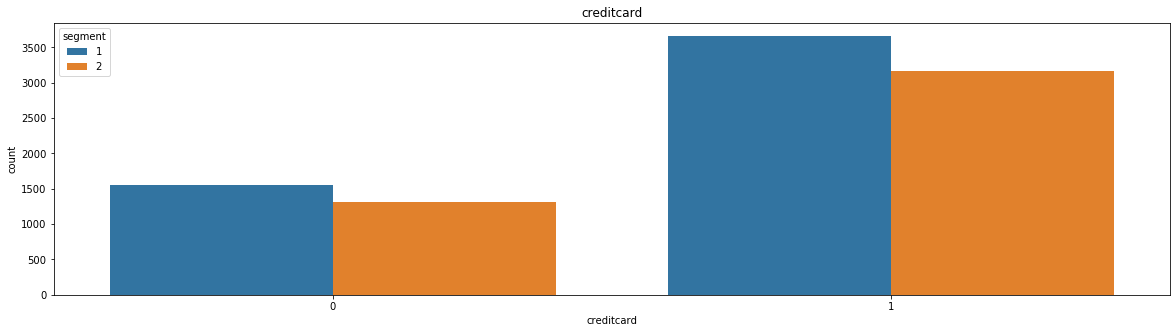

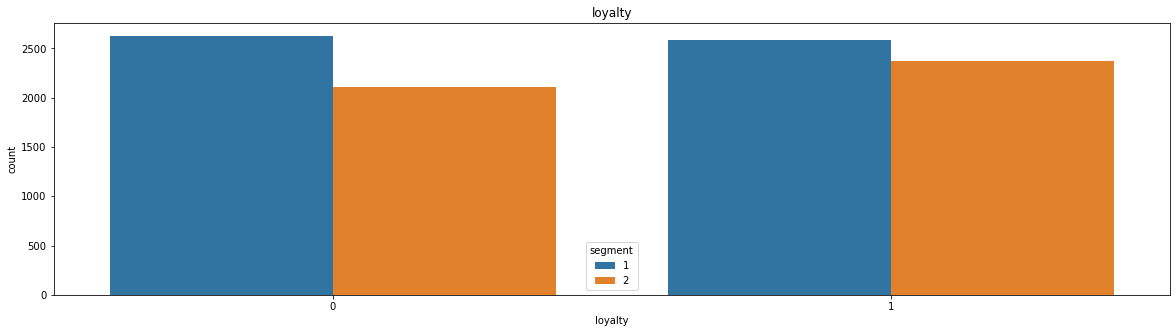

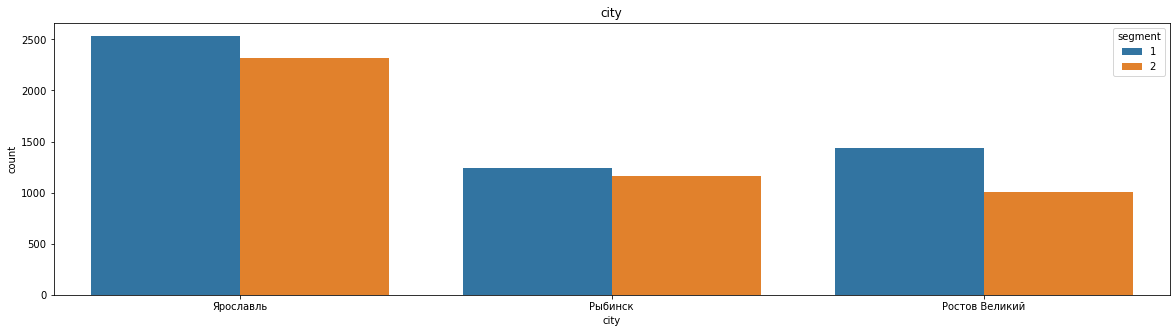

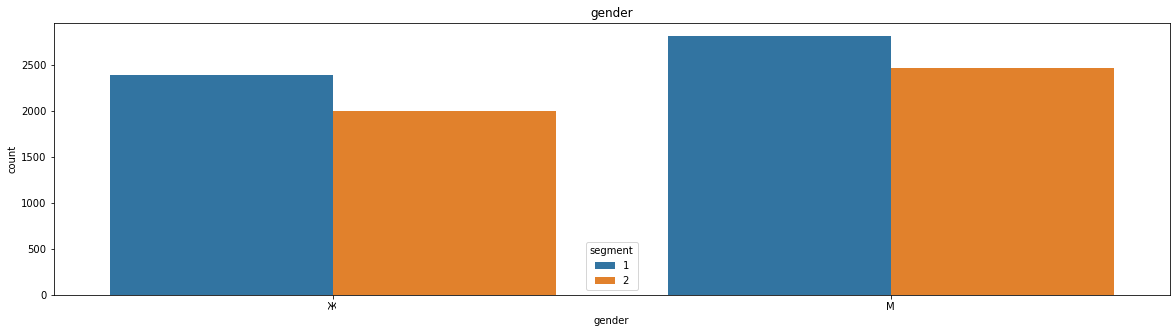

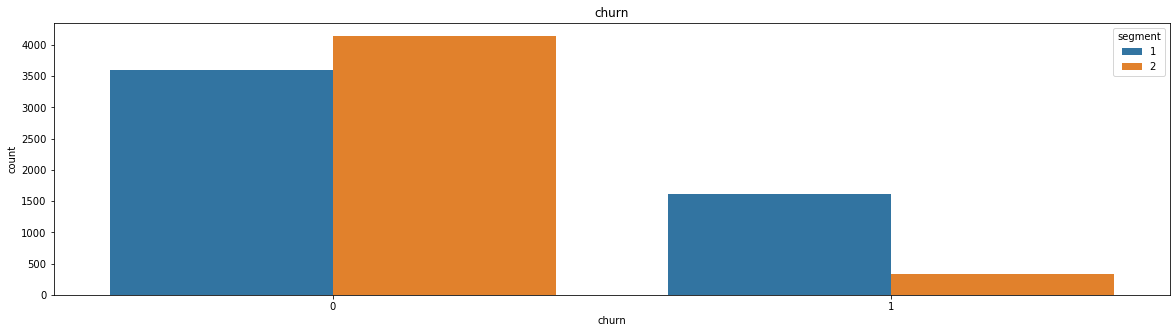

In [45]:
graf_segment_products(cat_columns)

Отток в 2м сегменте значительно ниже.

In [46]:
def graf_segment_float(list):
    for column in list:
        plt.figure(figsize=(20, 5))
        sns.histplot(x = data[column], hue='segment', data=data,palette='magma')
        plt.title(f'Признак - {column}')
        plt.ylabel("клиенты")
        plt.show()

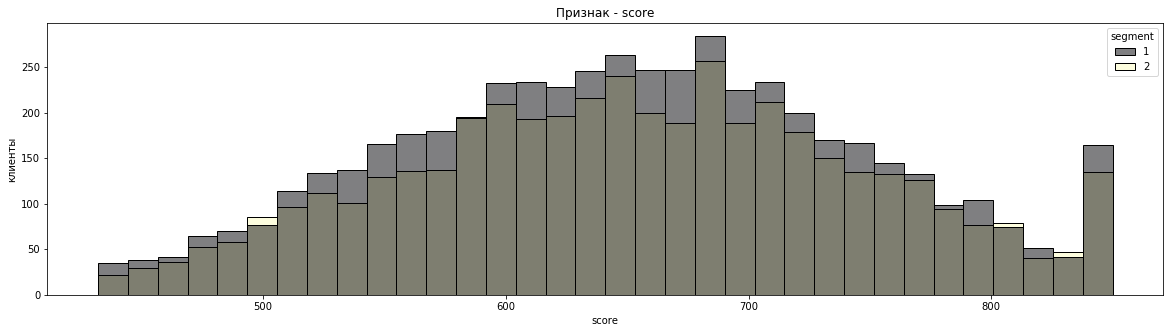

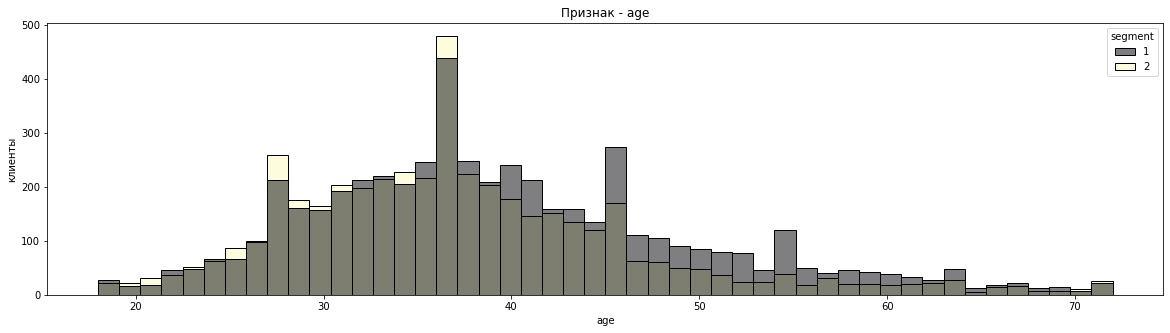

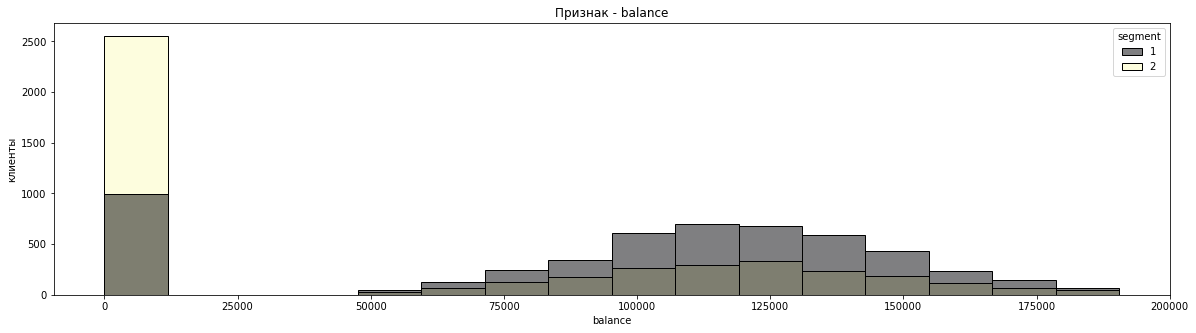

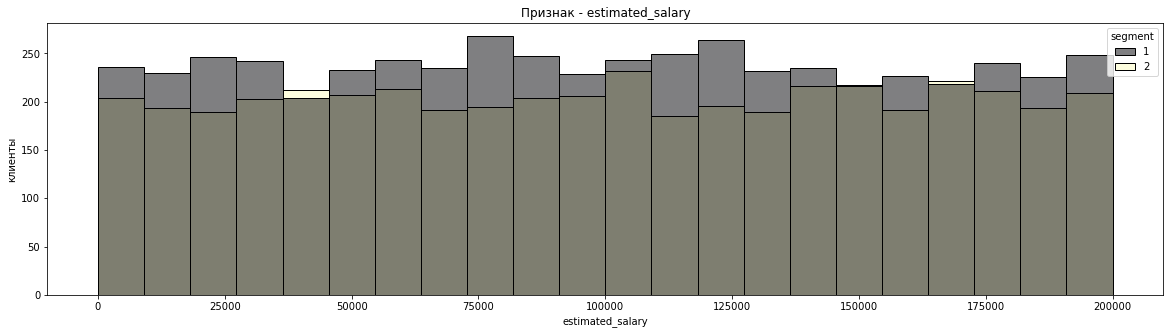

In [47]:
graf_segment_float(float_columns)

#### Выводы:
* Обращает на себя внимание  наличие большого количества нулевых балансов в сегменте 2, логично взял кредит стал постоянным надежным клиентом банка. 
* Клиенты 1го сегмента имеют баланс в среднем больше клиентов 2го сегмента.
* Клиенты 2го сегмента всреднем младше.
* В Ростове доля  клиентов 1го сегмента значительно выше, значит ожидаемый отток может быть больше. 

### Проверка статистических гипотез
<a class="anchor" id="5"></a>

#### Проверка гипотезы о равенстве доходов между клиентами с одним и двумя продуктами
* H0: Средние доходы клиентов с одним и двумя продуктами не различаються.
* H1: Средние доходы клиентов с одним и двумя продуктами различаються.

In [48]:
alpha = .05
result = st.ttest_ind(
   data.query('products==1')['estimated_salary'], 
   data.query('products==2')['estimated_salary'],equal_var=True)
print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.3705070121661601
Не получилось отвергнуть нулевую гипотезу


#### Проверка гипотезы о равенстве оттока клиентов между выделенными выше сегментами
* H0: Отток между выделенными выше сегментами не различаються статистически.
* H1: Отток между выделенными выше сегментами различается статистически.

In [49]:
ztest ,pval = stests.ztest(data.query('segment==1')['churn'], x2=data.query('segment==2')['churn'], value=0,alternative='two-sided',usevar='pooled', ddof=1.0)
print('p-значение: ', float(pval))
if (pval < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  2.0299008810696552e-199
Отвергаем нулевую гипотезу


In [50]:
data.query('segment==1')['churn']

0       1
1       0
2       1
4       0
9       0
       ..
9992    0
9993    0
9996    0
9997    1
9999    0
Name: churn, Length: 5211, dtype: int64

In [51]:
data.query('segment==1 and churn==1')['churn']

0       1
2       1
16      1
22      1
30      1
       ..
9962    1
9981    1
9982    1
9991    1
9997    1
Name: churn, Length: 1613, dtype: int64

In [52]:
data.query('segment==2')['churn']

3       0
5       1
6       0
8       0
10      0
       ..
9988    0
9989    0
9994    0
9995    0
9998    1
Name: churn, Length: 4479, dtype: int64

In [53]:
data.query('segment==2 and churn==1')['churn']

5       1
105     1
114     1
139     1
168     1
       ..
9863    1
9879    1
9947    1
9975    1
9998    1
Name: churn, Length: 333, dtype: int64

In [56]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([5211, 4479])
nobs = np.array([1613, 333])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

nan


#### Выводы.
* Доходы клиентов с одним и двумя продуктами не различаються статистически.
* Отток между сегментами отличаеться статистически.

## Общий вывод.
<a class="anchor" id="6"></a>

Проанализировав Датасет bank_dataset.csv содержащий данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

* Заменили названия столбцов на строчные.
* Заменили наны в столбце balance на 0.
* Типы данных по столбца удовлетворительные.
* проанализировав выбросы получилось, что для дальнейшего анализа из сета можно убрать людей старше 72 лет, имеющих рейтинг менее 432, имеющих баланс меньше 47505 и больше 190495.


                   В очищенном от выбросов сете, провели оценку кореляции признаков друг с другом и с уходом.
* В очищенном от выбросов сете, провели оценку кореляции признаков друг с другом и с уходом.

* Выраженной корреляции между признаками не наблюдаеться.
* Присутствует корреляция баланса и города ожидания Ростов великий 0.41, это ожидаемо административный центр.
* Между балансом и колличеством используемых продуктов слабая отрицательная взаимосвязь -0.30.
* Возраст коррелирует с оттоком 0.30.

                   Провели сегментацию клиентов по признаку количества продуктов, добавили столбец с сегментом.  1 3 4 продукта = 1 сегмент. 2 продукта = 2 сегмент.

* Вывод сегментация оправдана, средний шанс покинуть банк отличаеться по сегментам значительно. У 1го сегмента почти в 4 раза выше, кроме того баланс по сегментам в 2 раза выше в 1м сегменте.

### Выводы:

* Обращает на себя внимание наличие большого количества нулевых балансов в сегменте 2, логично взял кредит стал постоянным надежным клиентом банка.
* Клиенты 1го сегмента имеют баланс в среднем больше клиентов 2го сегмента.
* Клиенты 2го сегмента всреднем младше.
* В Ростове доля клиентов 1го сегмента значительно выше, значит ожидаемый отток может быть больше.

### Провели проверку гипотез
* Проверка гипотезы о равенстве доходов между клиентами с одним и двумя продуктами. Доходы равны.
* Проверка гипотезы о равенстве оттока клиентов между выделенными выше сегментами, Отток между выделенными выше сегментами различается статистически.

## Рекомендации .

* Необходимо предоставлять клиенту, 2 услуги, причем одна из них кредит. 
* Мало улуг плохо, такие клиенты больше подвержены уходу.

* К кредитным услугам необходимо добавлять дебетовые, и наоборот.

* Много услуг тоже плохо, такие клиенты, вероятно финансово не справляються с задачами.

* Идеальный клиент мужчина в возрасте до 40 лет, который пользуеться 2мя продуктами банка, необходима таргетная реклама.

* Группа людей пользующаяся 1 продуктом должна быть простимулирована к пользованию второй услугой. 

* Распределение людей пользующих ся 2мя услугами не одинаково. Для Ростова актуально применение действий для повышение колва клиентов с 2мя услугами в первую очередь. 

###  Ссылка на презентацию https://yadi.sk/i/MaQggHaF8XzN-A